<a href="https://colab.research.google.com/github/arya23-dev/ML/blob/main/Copy_of_LABExamML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.0
Confusion Matrix:
 [[0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
AUC Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 12 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 20 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: Unde

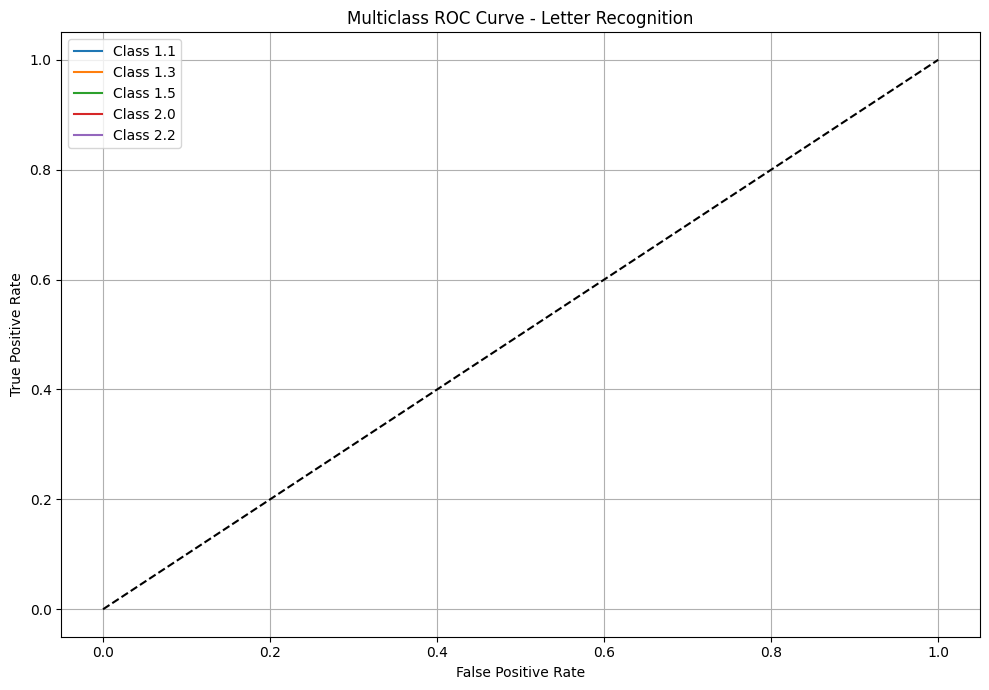

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("salary.csv")

# Assume first column is label, rest are features
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Encode labels and binarize for ROC
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_binarized = label_binarize(y_encoded, classes=range(len(le.classes_)))

# Train-test split
X_train, X_test, y_train, y_test, y_train_bin, y_test_bin = train_test_split(
    X, y_encoded, y_binarized, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM with RBF kernel in One-vs-Rest strategy
model = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
model.fit(X_train_scaled, y_train_bin)

# Predictions and probabilities
y_pred_bin = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

# Evaluation
y_pred_labels = y_pred_bin.argmax(axis=1)
y_test_labels = y_test_bin.argmax(axis=1)

print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))
print("AUC Score:", roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr'))

# Plot ROC curves for a few classes (to keep plot readable)
plt.figure(figsize=(10, 7))
for i in range(min(5, y_test_bin.shape[1])):  # Plot only first 5 classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {le.inverse_transform([i])[0]}")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve - Letter Recognition')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Dataset Preview:
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

Missing Values:
YearsExperience    2
Salary             0
dtype: int64

Coefficient: 9376.994594726646
Intercept: 26976.596273466144

Mean Squared Error: 43277377.362307236

Predicted Salary for 12 years of experience: 139500.5314101859


<ipython-input-1-e04af2239fa7>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsExperience'].fillna(df['YearsExperience'].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


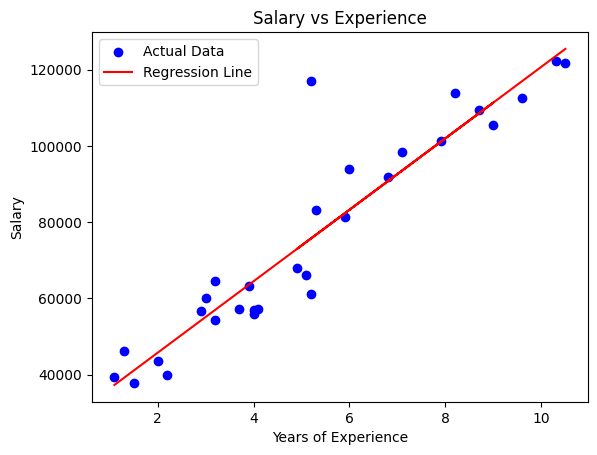

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'salary.csv'
df = pd.read_csv(file_path)

# Display first few rows of dataset
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values by filling with the mean of the column
df['YearsExperience'].fillna(df['YearsExperience'].mean(), inplace=True)

# Assuming the dataset has two columns: 'YearsExperience' and 'Salary'
X = df[['YearsExperience']]
y = df['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print(f"\nCoefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")

# Predict salary for 12 years of experience
experience = np.array([[12]])
predicted_salary = model.predict(experience)
print(f"\nPredicted Salary for 12 years of experience: {predicted_salary[0]}")

# Visualizing the Regression Line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.legend()
plt.show()